In [35]:
import pandas as pd
df = pd.read_csv("test_x.csv")
df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491



<a id=30></a>
### 📂 **Variable Description**

As we start basic analysis and description of  variables in our dataset is crucial for effective analysis and modeling.
<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">




- **index**: A unique identifier for each row in the dataset.
- **Cinsiyet**: Gender of the individual. Possible values include 'Kadın' (Female) and 'Erkek' (Male).
- **Yaş Grubu**: Age group of the individual. Examples include '31-40', '>60', '18-30', etc.
- **Medeni Durum**: Marital status of the individual. Examples include 'Bekar' (Single) and 'Evli' (Married).
- **Eğitim Düzeyi**: Education level of the individual. Examples include 'Yüksek Lisans Mezunu' (Master's Degree Graduate), 'Lise Mezunu' (High School Graduate), etc.
- **İstihdam Durumu**: Employment status. Examples include 'Düzenli ve Ücretli Bir İşi Var' (Has a Regular and Paid Job), 'Kendi İşinin Sahibi' (Owns Their Own Business), etc.
- **Yıllık Ortalama Gelir**: Average annual income.
- **Yaşadığı Şehir**: The city where the individual resides. Examples include 'Büyük Şehir' (Big City), 'Küçük Şehir' (Small City), 'Kırsal' (Rural).
- **En Çok İlgilendiği Ürün Grubu**: The product group the individual is most interested in. Examples include 'Elektronik ve Teknolojik Ürünler' (Electronics and Technological Products), 'Spor Malzemeleri' (Sports Equipment), 'Giyim' (Clothing).
- **Yıllık Ortalama Satın Alım Miktarı**: Average annual purchase amount.
- **Yıllık Ortalama Sipariş Verilen Ürün Adedi**: Average number of products ordered annually.
- **Eğitime Devam Etme Durumu**: Education continuation status. Possible values include 'Ediyor' (Continuing) and 'Etmiyor' (Not Continuing).
- **Öbek İsmi**: Cluster name. Examples include 'obek_4', 'obek_5', etc.
- **Yıllık Ortalama Sepete Atılan Ürün Adedi**: Average number of products added to the cart annually.



</div>

We can see that the data inspected here has two major dominant sides, purchase data and socio-economic status. Our examination will be focused on these areas.



<a id=YOUR_ANCHOR_ID></a>
### 📂 **Preexamination**

For a proper start, we should look for any garbage or not aplicable data.

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

As shown above there is 21 zero values in purchase quantity. As we further investigate, we will see that all the zero values are in Öbek 1. In ideal case these 21 rows of data should be avoided but as we take a look into test data we can see the same pattern is also present.

Due to other aspects of the data like income, amount, city, education. The models we tested give no different results with or without. So it is decided to keep the data.

</div>


In [ ]:
# Check for NaN or Null values
nan_null_check = df.isnull().any()

# Check for 0 values
zero_check = (df == 0).any()

# Display columns with NaN or Null values and 0 values
nan_null_columns = nan_null_check.index[nan_null_check].tolist()
zero_columns = zero_check.index[zero_check].tolist()

print(f"Columns with NaN or Null values: {nan_null_columns}")
print(f"Columns with 0 values: {zero_columns}")

zero_count = (df['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] == 0).sum()

print(f"Number of zeros in 'Yıllık Ortalama Sipariş Verilen Ürün Adedi' column: {zero_count}")


Columns with NaN or Null values: []
Columns with 0 values: ['index', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi']
Number of zeros in 'Yıllık Ortalama Sipariş Verilen Ürün Adedi' column: 21


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns



<a id=YOUR_ANCHOR_ID></a>
### 📂 **Cross Examination**

First step into the data...

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

Before creating new dimensions in our data, we need to avoid duplicate and unnecesary dimensions for sake of performance and higher levels of model prediction.

</div>


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorial-categorial association."""
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# List of columns for which we need to find correlation
cols = ["Eğitim Düzeyi", "Yaş Grubu", "İstihdam Durumu", "Yaşadığı Şehir", "Eğitime Devam Etme Durumu"]

# Create an empty DataFrame for storing Cramér's V values
cramers_v_matrix = pd.DataFrame(index=cols, columns=cols)

# Calculate Cramér's V for each pair of columns
for col1 in cols:
    for col2 in cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_matrix


,Eğitim Düzeyi,Yaş Grubu,İstihdam Durumu,Yaşadığı Şehir,Eğitime Devam Etme Durumu
Eğitim Düzeyi,1.0,0.122322,0.133147,0.137407,0.251026
Yaş Grubu,0.122322,1.0,0.188596,0.204114,0.435499
İstihdam Durumu,0.133147,0.188596,1.0,0.149374,0.127189
Yaşadığı Şehir,0.137407,0.204114,0.149374,1.0,0.210002
Eğitime Devam Etme Durumu,0.251026,0.435499,0.127189,0.210002,1.0


<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">
Despite there is no statisticaly meaningful correlation we can see there is a slightly higher correlation between, age and status of studentship. This might give us the idea that maybe our models clustered some of the young-students alongside others.
But again this is just a blind throw.
</div>

In [ ]:
def conditional_entropy(x, y):
    """Calculate the conditional entropy of x given y: S(x|y)"""
    y_counter = np.array(y.value_counts())
    xy_counter = np.array(pd.crosstab(x, y))
    p_xy = xy_counter / len(x)
    p_y = y_counter / len(y)
    ent = sum([sum([-p_xy[i][j] * np.log(p_xy[i][j] / p_y[j])
                    for j in range(len(p_y))
                    if p_xy[i][j] != 0]) for i in range(len(p_xy))])
    return ent

def theils_u(x, y):
    """Calculate Theil's U statistic (Uncertainty coefficient)"""
    s_xy = conditional_entropy(x, y)
    x_counter = np.array(x.value_counts())
    total_occurrences = sum(x_counter)
    p_x = x_counter / total_occurrences
    s_x = -sum([p_x[i] * np.log(p_x[i]) for i in range(len(p_x)) if p_x[i] != 0])
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

# Create an empty DataFrame for storing Theil's U values
theils_u_matrix = pd.DataFrame(index=cols, columns=cols)

# Calculate Theil's U for each pair of columns
for col1 in cols:
    for col2 in cols:
        theils_u_matrix.loc[col1, col2] = theils_u(df[col1], df[col2])

theils_u_matrix


,Eğitim Düzeyi,Yaş Grubu,İstihdam Durumu,Yaşadığı Şehir,Eğitime Devam Etme Durumu
Eğitim Düzeyi,1.257877,0.021032,0.120084,0.057526,0.575747
Yaş Grubu,0.361759,1.003909,0.171895,0.09518,0.792837
İstihdam Durumu,0.467179,0.049895,1.179552,0.097633,0.96905
Yaşadığı Şehir,0.43275,0.054668,0.190897,1.064483,0.905934
Eğitime Devam Etme Durumu,1.257343,0.216904,0.509597,0.253015,3.581894


Previously we worked with Crammers V method, now we will use Theil's U method because we both have overlapping and overreaching categories/columns
<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

As we previously talked about no significance in correlation in the aspect of duplicate. We still can make some little assumptions about the data, like education level and status, age and city. All these metrics fit into present society. So we can continue to think our clusters based on socio-economic and purchase data 

</div>

Below, is the better visualised version of previous tests.

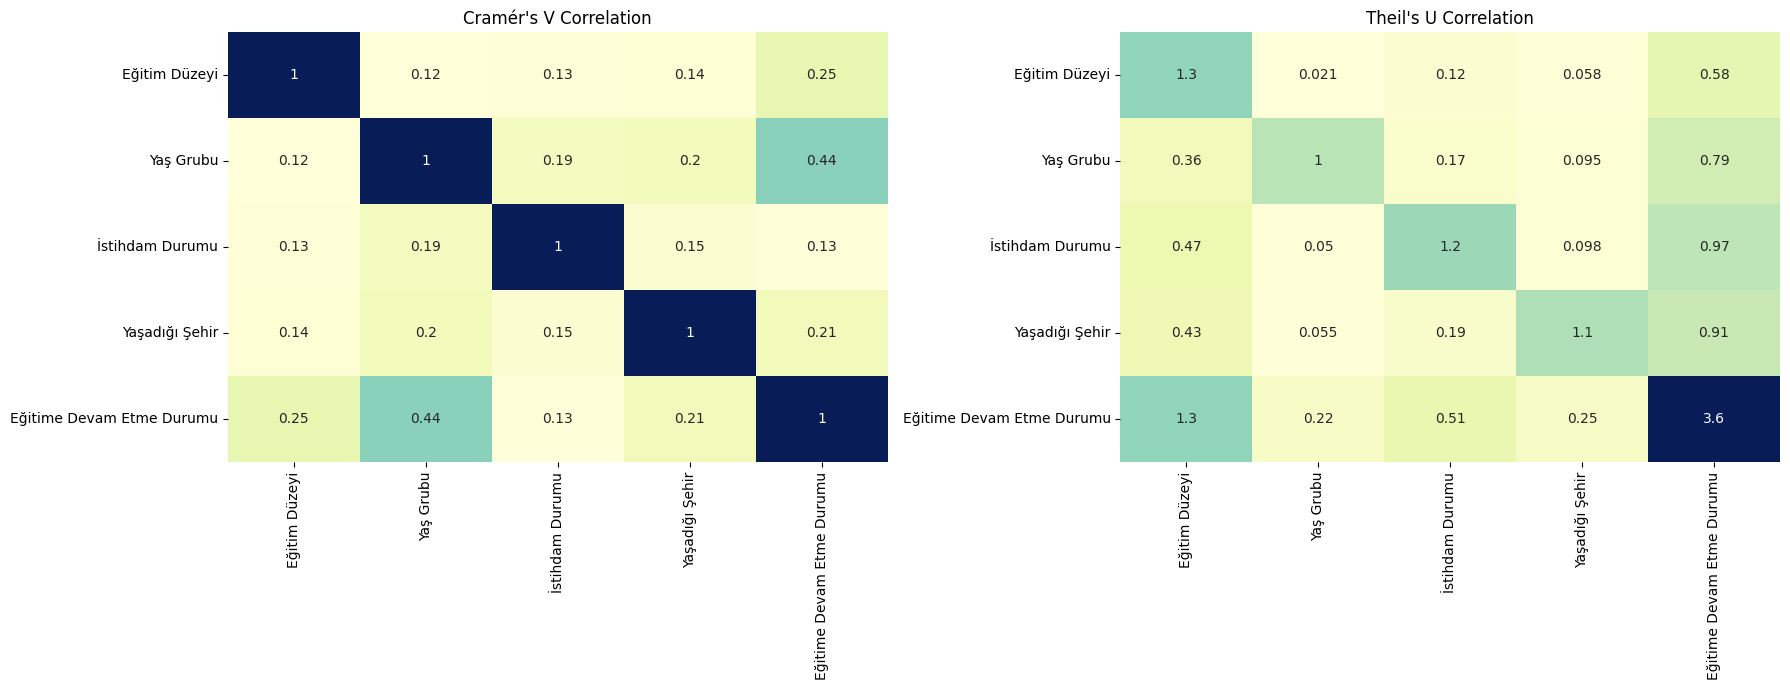

In [ ]:
# Convert matrices to numeric type
updated_cramers_v_matrix = cramers_v_matrix.astype(float)
updated_theils_u_matrix =theils_u_matrix.astype(float)

# Draw the heatmaps again
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Cramér's V heatmap
sns.heatmap(updated_cramers_v_matrix, annot=True, cmap="YlGnBu", cbar=False, ax=ax[0])
ax[0].set_title("Cramér's V Correlation")

# Theil's U heatmap
sns.heatmap(updated_theils_u_matrix, annot=True, cmap="YlGnBu", cbar=False, ax=ax[1])
ax[1].set_title("Theil's U Correlation")

plt.tight_layout()
plt.show()

In [ ]:
# Add the new column to the list
cols.append("En Çok İlgilendiği Ürün Grubu")

# Create an empty DataFrame for storing updated Cramér's V values
updated_cramers_v_matrix = pd.DataFrame(index=cols, columns=cols)

# Calculate Cramér's V for each pair of columns
for col1 in cols:
    for col2 in cols:
        if col1 == col2:
            updated_cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            updated_cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

updated_cramers_v_matrix

,Eğitim Düzeyi,Yaş Grubu,İstihdam Durumu,Yaşadığı Şehir,Eğitime Devam Etme Durumu,En Çok İlgilendiği Ürün Grubu
Eğitim Düzeyi,1.0,0.122322,0.133147,0.137407,0.251026,0.109817
Yaş Grubu,0.122322,1.0,0.188596,0.204114,0.435499,0.04936
İstihdam Durumu,0.133147,0.188596,1.0,0.149374,0.127189,0.049805
Yaşadığı Şehir,0.137407,0.204114,0.149374,1.0,0.210002,0.049358
Eğitime Devam Etme Durumu,0.251026,0.435499,0.127189,0.210002,1.0,0.054226
En Çok İlgilendiği Ürün Grubu,0.109817,0.04936,0.049805,0.049358,0.054226,1.0


In [ ]:
# Create an empty DataFrame for storing updated Theil's U values
updated_theils_u_matrix = pd.DataFrame(index=cols, columns=cols)

# Calculate Theil's U for each pair of columns
for col1 in cols:
    for col2 in cols:
        updated_theils_u_matrix.loc[col1, col2] = theils_u(df[col1], df[col2])

updated_theils_u_matrix

,Eğitim Düzeyi,Yaş Grubu,İstihdam Durumu,Yaşadığı Şehir,Eğitime Devam Etme Durumu,En Çok İlgilendiği Ürün Grubu
Eğitim Düzeyi,1.257877,0.021032,0.120084,0.057526,0.575747,0.03853
Yaş Grubu,0.361759,1.003909,0.171895,0.09518,0.792837,0.03591
İstihdam Durumu,0.467179,0.049895,1.179552,0.097633,0.96905,0.045002
Yaşadığı Şehir,0.43275,0.054668,0.190897,1.064483,0.905934,0.041493
Eğitime Devam Etme Durumu,1.257343,0.216904,0.509597,0.253015,3.581894,0.112111
En Çok İlgilendiği Ürün Grubu,0.348269,0.009151,0.13772,0.056125,0.716087,1.029564


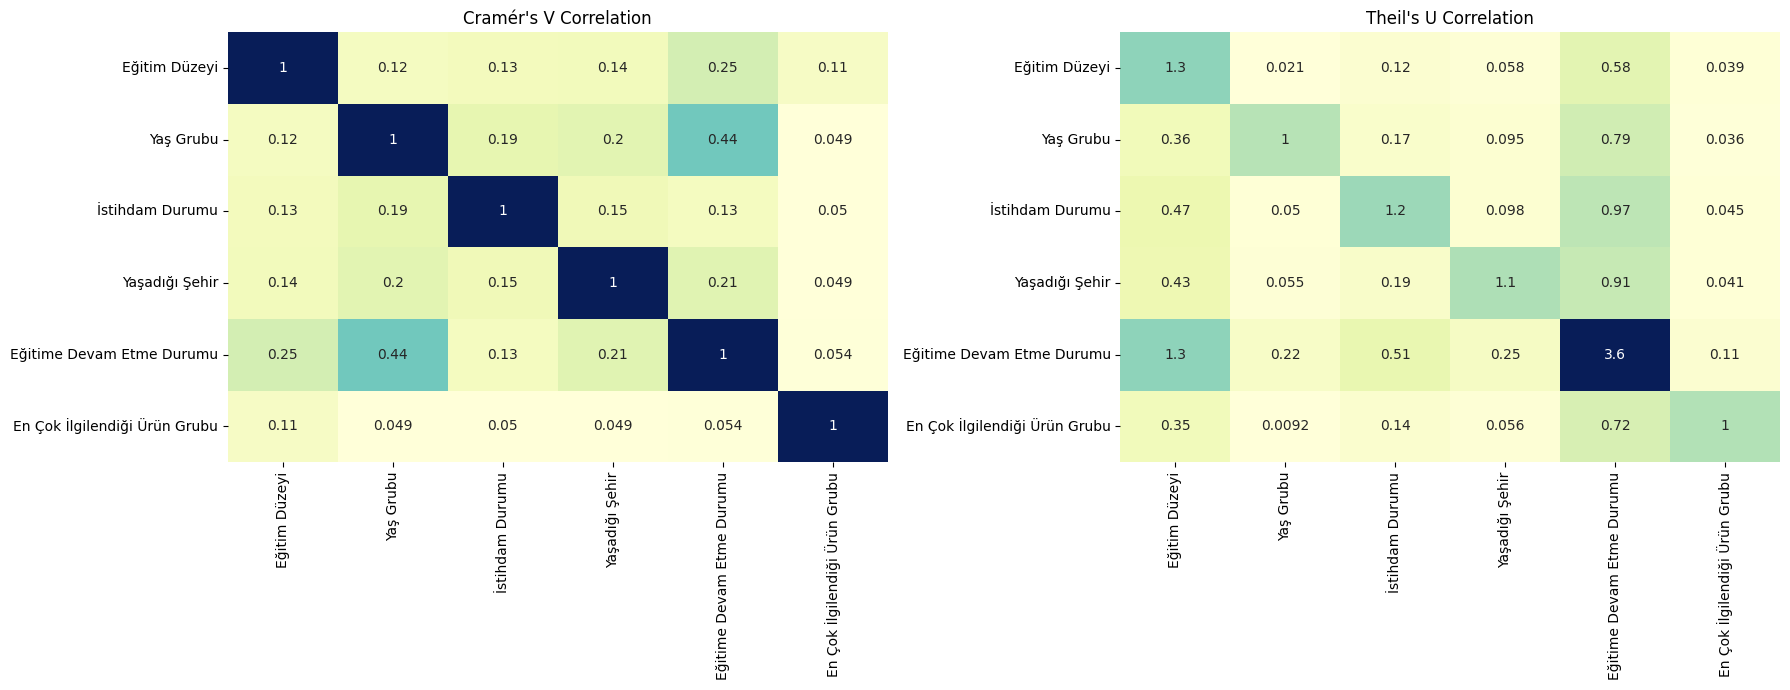

In [ ]:
# Convert matrices to numeric type
updated_cramers_v_matrix = updated_cramers_v_matrix.astype(float)
updated_theils_u_matrix = updated_theils_u_matrix.astype(float)

# Draw the heatmaps again
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Cramér's V heatmap
sns.heatmap(updated_cramers_v_matrix, annot=True, cmap="YlGnBu", cbar=False, ax=ax[0])
ax[0].set_title("Cramér's V Correlation")

# Theil's U heatmap
sns.heatmap(updated_theils_u_matrix, annot=True, cmap="YlGnBu", cbar=False, ax=ax[1])
ax[1].set_title("Theil's U Correlation")

plt.tight_layout()
plt.show()

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

In this area we searched for a correlation between other aspects of the data and product group. And none significant correlation found. But we still can say, rural areas have different purchase dynamics towards different product groups.

</div>

In [ ]:
unique_heaps = df["Öbek İsmi"].unique()

# Define the list of columns excluding "Öbek İsmi"
cols_without_obek_isimi = [col for col in cols if col != "Öbek İsmi"]

# Recalculate the correlations using the corrected list of columns
cramers_v_by_heap = {}
theils_u_by_heap = {}

# For each unique heap, calculate its correlation with the other columns
for heap in unique_heaps:
    heap_data = (df["Öbek İsmi"] == heap).astype(int)
    
    cramers_v_values = {}
    theils_u_values = {}
    for col in cols_without_obek_isimi:
        cramers_v_values[col] = cramers_v(heap_data, df[col])
        theils_u_values[col] = theils_u(heap_data, df[col])
    
    cramers_v_by_heap[heap] = cramers_v_values
    theils_u_by_heap[heap] = theils_u_values

# Convert dictionaries to DataFrame for better visualization
cramers_v_by_heap_df = pd.DataFrame(cramers_v_by_heap).T
theils_u_by_heap_df = pd.DataFrame(theils_u_by_heap).T

cramers_v_by_heap_df



,Eğitim Düzeyi,Yaş Grubu,İstihdam Durumu,Yaşadığı Şehir,Eğitime Devam Etme Durumu,En Çok İlgilendiği Ürün Grubu
obek_4,0.277019,0.324907,0.132855,0.397348,0.075887,0.075319
obek_5,0.449123,0.223230,0.144063,0.217594,0.099821,0.239435
obek_8,0.296179,0.521553,0.135216,0.208943,0.730978,0.068412
obek_3,0.274662,0.165513,0.171443,0.044246,0.121599,0.203466
obek_6,0.358274,0.528478,0.581324,0.421749,0.154690,0.082842
obek_1,0.341732,0.136253,0.111630,0.134888,0.107673,0.362107
obek_7,0.301476,0.268231,0.259368,0.204130,0.067833,0.083827
obek_2,0.308811,0.124412,0.398688,0.131681,0.112777,0.212936




<a id=YOUR_ANCHOR_ID></a>
### 📂 **Correlation of Heaps/Clusters and reamining data**
We can start to determine how to describe clusters
<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

So as seen some and we talked at the start there is a high corelation between öbek 8 and status of studentship. Later in our description we will use this.

</div>


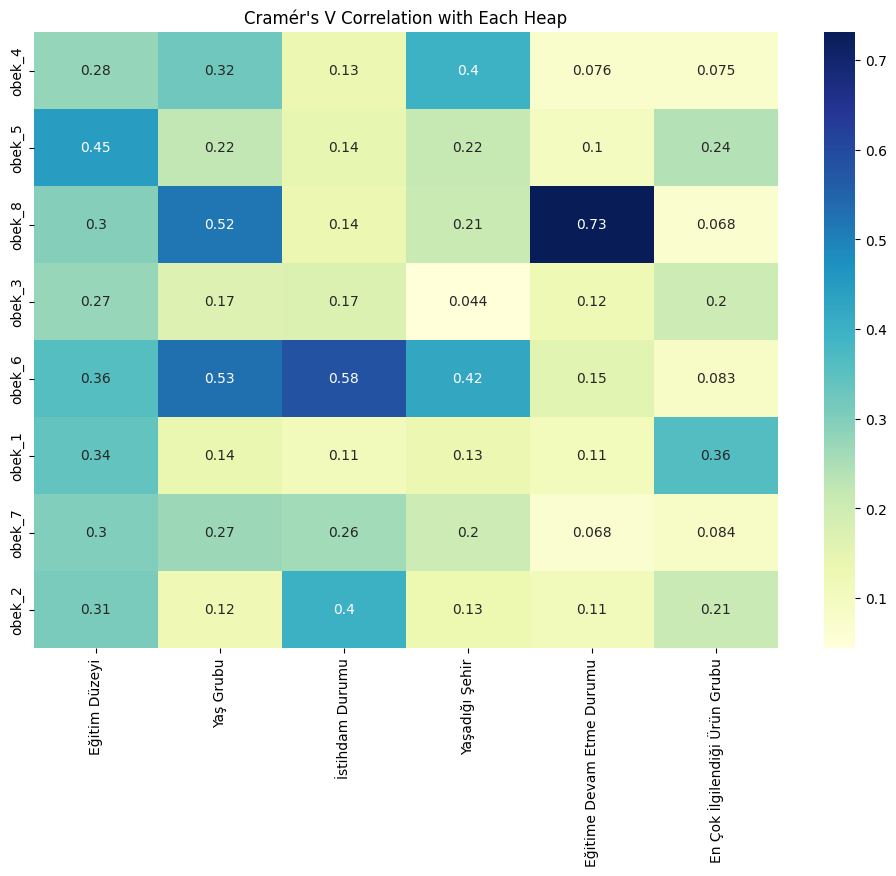

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_by_heap_df, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Cramér's V Correlation with Each Heap")
plt.show()

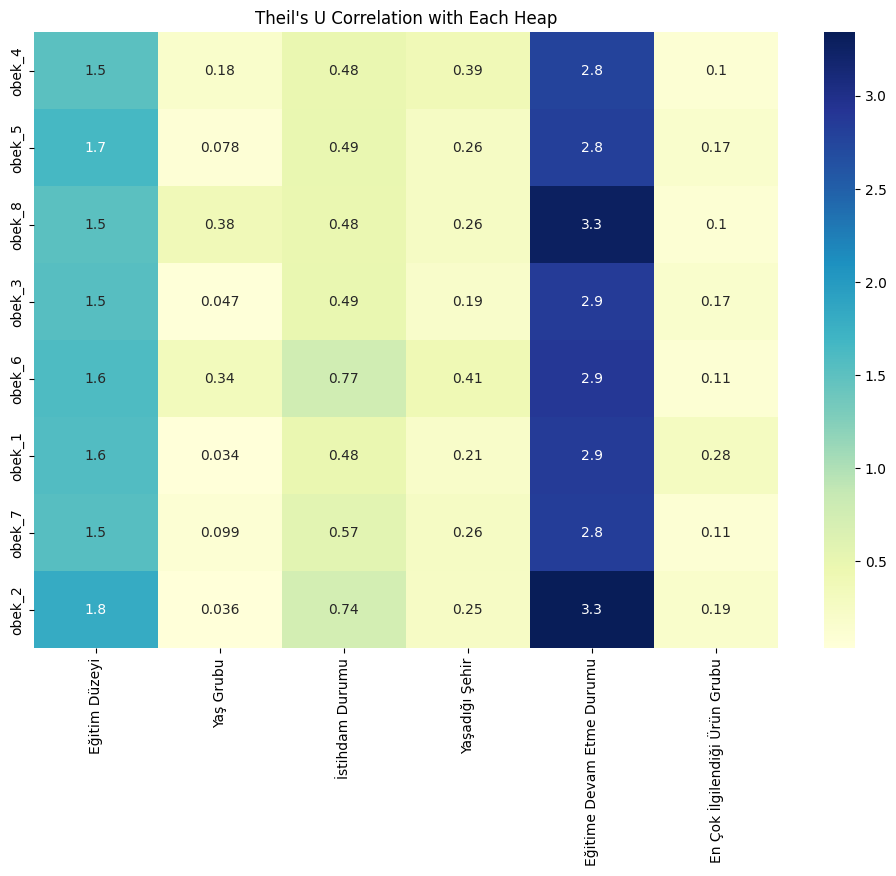

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(theils_u_by_heap_df, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Theil's U Correlation with Each Heap")
plt.show()

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

As we approach form different aspects we can see there is another correlation between öbek 6/2 and status of occupation. Later we are gonna use this information

</div>

<a id=YOUR_ANCHOR_ID></a>
### 📂 **Creating new metrics**
We can start creating new matrics and contunie with the analysis. 
<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">
Certainly! Let's break down and comment on each of the operations you've provided:

1. **almaOranı (Purchase Ratio)**:
   \[
   almaOranı= yıllıkOrtSepet/yıllıkOrtAdet
   \]

   This variable represents the ratio of the average number of items added to the cart annually (`yıllıkOrtSepet`) to the average number of items ordered annually (`yıllıkOrtAdet`). In essence, it gives us an understanding of how many of the items added to the cart are actually purchased.

2. **sepetBaşınaSatış (Sales Per Cart)**:
   \[
   sepetBaşınaSatış = yıllıkOrtAdet/yıllıkOrtSepet
   \]

    This is the inverse of the previous metric. It indicates the number of items ordered for every item added to the cart annually.

3. **ürünBaşıHarcama (Spending Per Product)**:
   \[
   ürünBaşıHarcama = yıllıkOrtMiktar/yıllıkOrtAdet
   \]

   This variable tells us the average amount spent on each item ordered annually.

4. **harcamaBaşıÜrün (Products Per Spending)**:
   \[
   harcamaBaşıÜrün = yıllıkOrtAdet/yıllıkOrtMiktar
   \]

   This metric represents the number of products ordered for every unit of spending annually. It's the inverse of the previous metric.

5. **sepetBaşıHarcama (Spending Per Cart)**:
   \[
   sepetBaşıHarcama = yıllıkOrtMiktar/yıllıkOrtSepet
   \]

   This variable gives us the average spending amount for every item added to the cart annually.

6. **gelireOranlaHarcama (Spending Relative to Income)**:
   \[
   gelireOranlaHarcama = yıllıkOrtMiktar/yıllıkOrtGelir
   \]
    This metric indicates the proportion of an individual's annual income that is spent on purchases. It provides insights into spending habits relative to income.

Here we studied quantitive data and found new ways to characterise clusters. But some of the new metrics not applicable because of the 0 values we talked at the start.
</div>



<a id=YOUR_ANCHOR_ID></a>
### 📂 **Alternative Metrics and Conclusion**
Quality of Purchase and Decisiveness of Purchase
<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">
"Alma Oranı" = "Yıllık Ortalama Sipariş Verilen Ürün Adedi"/ "Yıllık Ortalama Sepete Atılan Ürün Adedi"

Purchase Ratio= Yearly Average Number of Items Added to Cart / Yearly Average Number of Items Ordered
​

"Kararlılık" = "Alma Oranı"/ "Yıllık Ortalama Sepete Atılan Ürün Adedi"
Decisiveness= Yearly Average Number of Items Added to Cart / Purchase Ratio


"Kalite" = "Kararlılık"* "Ürün Başı Harcama"
 Quality=Decisiveness×Spending Per Product


But after getting NaN results because of 0 values in yearly purchase mean. We changed our metrics to embrace zero values.

Purchase ratio become, Ordered items per added item to the cart
then we can take reciprocal(çarpmaya göre tersi) of this ratio so we do net get inf. values. Decisiveness stood same.  In the other hand quality should have change because of spending per product so there is two approaches, changing places of division elements and taking reciprocal or just divide and take.

Difference between theese conditions are lower is better or higher is better. Lets talk about it.

On the hand of decisiveness, if this customer is decisive we can show more adds that he added into his cart cuz its more likely for him to purchase. In this way, we can focus on some clusters and gain more profitability, use our marketing budget more effectively.

In the other hand to the quality, this metric shows us how much this person is going to give us in not the number of product but in the amount of payment.

According to current marketing strategy even though they look similar they will made a significant impact on customer. ex. member benefist for high quality buyers...


</div>

At last after we talked about our metrics,corelation and all the other necessity. Lets describe our clusters.

In [ ]:
df["Alma Oranı"] = df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"]/df["Yıllık Ortalama Sepete Atılan Ürün Adedi"]
df["Ürün Başı Harcama"] = df['Yıllık Ortalama Satın Alım Miktarı'] / df['Yıllık Ortalama Sipariş Verilen Ürün Adedi']
df['Gelire Oranla Harcama'] = df['Yıllık Ortalama Satın Alım Miktarı'] / df['Yıllık Ortalama Gelir']
df["Kararlılık"] = df["Alma Oranı"]/df["Yıllık Ortalama Sepete Atılan Ürün Adedi"]
df["Kalite"] = df["Kararlılık"]*df["Ürün Başı Harcama"]
df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Alma Oranı,Ürün Başı Harcama,Gelire Oranla Harcama,Kararlılık,Kalite
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904,0.362461,857.956271,0.042780,0.003521,3.021035
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053,0.140611,358.786954,0.016832,0.001711,0.613918
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426,0.390743,179.291767,0.036951,0.002758,0.494539
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397,0.901730,416.273023,0.019583,0.052741,21.954567
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459,0.717612,536.878878,0.019844,0.035056,18.820803


In [ ]:
# List of numeric columns to analyze
numeric_columns = [
    'Yıllık Ortalama Gelir',
    'Yıllık Ortalama Satın Alım Miktarı',
    'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
    'Yıllık Ortalama Sepete Atılan Ürün Adedi',
    'Alma Oranı',
    'Gelire Oranla Harcama',
    'Kararlılık',

]

# Calculate average values for numeric columns for each heap type
average_values = df.groupby('Öbek İsmi')[numeric_columns].mean()
average_values


,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Alma Oranı,Gelire Oranla Harcama,Kararlılık
Öbek İsmi,,,,,,,
obek_1,229513.847974,6047.195827,5.865500,13.259577,0.500890,0.027149,0.053489
obek_2,172827.509911,4996.038895,20.665536,50.989216,0.429435,0.027304,0.009809
obek_3,327899.094458,7360.697229,15.209040,21.571290,0.754359,0.023935,0.039489
obek_4,817975.516312,32405.008963,38.890713,98.028592,0.407717,0.040509,0.005189
obek_5,222224.036354,4542.305314,10.697475,99.563686,0.114884,0.019925,0.001830
obek_6,480117.776102,39440.273682,29.776795,50.677581,0.605366,0.081696,0.012842
obek_7,351949.976050,26429.293943,20.279514,98.180834,0.217425,0.075230,0.002900
obek_8,255354.926670,9277.243731,49.087230,146.416046,0.352243,0.036708,0.003046


In [ ]:
# Distribution of 'Cinsiyet' (Gender) for each heap type
gender_distribution = df.groupby('Öbek İsmi')['Cinsiyet'].value_counts(normalize=True).unstack().fillna(0) * 100
gender_distribution


Cinsiyet,Erkek,Kadın
Öbek İsmi,,
obek_1,47.109827,52.890173
obek_2,3.473492,96.526508
obek_3,90.071942,9.928058
obek_4,51.111111,48.888889
obek_5,81.586402,18.413598
obek_6,50.000000,50.000000
obek_7,50.071942,49.928058
obek_8,49.790795,50.209205


In [ ]:
# Distribution of 'Yaş Grubu' (Age Group) for each heap type
age_group_distribution = df.groupby('Öbek İsmi')['Yaş Grubu'].value_counts(normalize=True).unstack().fillna(0) * 100
age_group_distribution


Yaş Grubu,18-30,31-40,41-50,51-60,>60
Öbek İsmi,,,,,
obek_1,25.144509,22.976879,24.421965,19.364162,8.092486
obek_2,24.497258,19.378428,19.926874,18.098720,18.098720
obek_3,19.280576,21.294964,18.705036,22.014388,18.705036
obek_4,40.555556,57.222222,0.694444,1.250000,0.277778
obek_5,35.552408,49.575071,5.665722,5.240793,3.966006
obek_6,2.906977,4.796512,5.959302,56.686047,29.651163
obek_7,20.000000,37.266187,33.237410,4.748201,4.748201
obek_8,97.210600,1.394700,0.278940,0.836820,0.278940


In [ ]:
# Distribution of 'Eğitim Düzeyi' (Education Level) for each heap type
education_level_distribution = df.groupby('Öbek İsmi')['Eğitim Düzeyi'].value_counts(normalize=True).unstack().fillna(0) * 100
education_level_distribution


Eğitim Düzeyi,Doktora Mezunu,Doktora Ötesi,Eğitimsiz,Lise Mezunu,Ortaokul Mezunu,Yüksek Lisans Mezunu,Yüksekokul Mezunu,Üniversite Mezunu,İlkokul Mezunu
Öbek İsmi,,,,,,,,,
obek_1,3.757225,6.069364,20.520231,19.364162,18.930636,4.190751,5.057803,4.335260,17.774566
obek_2,3.839122,5.484461,17.184644,18.829982,19.744059,3.839122,4.021938,4.936015,22.120658
obek_3,1.007194,0.575540,9.208633,51.942446,8.489209,3.021583,11.654676,5.467626,8.633094
obek_4,10.000000,6.388889,2.222222,4.027778,3.055556,17.361111,14.722222,38.888889,3.333333
obek_5,4.815864,2.832861,0.708215,75.637394,2.974504,3.399433,2.832861,4.107649,2.691218
obek_6,4.796512,5.087209,3.779070,2.470930,2.616279,9.302326,9.738372,60.174419,2.034884
obek_7,9.496403,4.316547,3.741007,6.762590,5.323741,28.920863,5.179856,31.366906,4.892086
obek_8,0.557880,0.278940,1.115760,22.733612,2.231520,8.368201,30.822873,30.822873,3.068340


In [ ]:

job_situation_distrubution = df.groupby('Öbek İsmi')['İstihdam Durumu'].value_counts(normalize=True).unstack().fillna(0) * 100
job_situation_distrubution


İstihdam Durumu,Düzenli ve Ücretli Bir İşi Var,Emekli,Kendi İşinin Sahibi,İşsiz veya Düzenli Bir İşi Yok
Öbek İsmi,,,,
obek_1,51.589595,0.433526,18.352601,29.624277
obek_2,17.733090,0.731261,5.301645,76.234004
obek_3,40.431655,9.352518,32.374101,17.841727
obek_4,50.416667,0.555556,14.027778,35.000000
obek_5,60.623229,0.424929,22.096317,16.855524
obek_6,35.901163,50.436047,12.645349,1.017442
obek_7,82.877698,5.179856,11.223022,0.719424
obek_8,58.437936,0.278940,10.599721,30.683403


In [ ]:

most_interested_product_distrubution = df.groupby('Öbek İsmi')['En Çok İlgilendiği Ürün Grubu'].value_counts(normalize=True).unstack().fillna(0) * 100
most_interested_product_distrubution


En Çok İlgilendiği Ürün Grubu,Elektronik ve Teknolojik Ürünler,Ev ve Mobilya,Giyim,Kozmetik,Spor Malzemeleri
Öbek İsmi,,,,,
obek_1,3.323699,7.080925,62.861272,25.433526,1.300578
obek_2,7.312614,38.574040,40.402194,5.484461,8.226691
obek_3,29.064748,21.438849,19.568345,0.431655,29.496403
obek_4,17.777778,18.194444,21.666667,21.111111,21.250000
obek_5,34.985836,6.798867,15.864023,10.481586,31.869688
obek_6,17.151163,26.889535,18.750000,17.005814,20.203488
obek_7,19.856115,27.194245,20.431655,17.985612,14.532374
obek_8,18.549512,21.199442,21.757322,21.199442,17.294282




<a id=YOUR_ANCHOR_ID></a>
### 📂 **Cluster Descriptions 1**



<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">



1. **obek_1**:
    - Slightly more females than males.
    - Age distribution is relatively even across all age groups, with a slightly higher percentage in the 18-30 range.
    - A significant percentage (20.52%) are categorized as "Eğitimsiz" (Uneducated).
    -%51,58 of them  have a regular and paid job
    -%62,86 of them interested in clothes
  
2. **obek_2**:
    - Predominantly females (96.53%).
    - Age distribution is relatively even.
    - A significant percentage are either "Eğitimsiz" or "Lise Mezunu" (High School Graduates).
    -%76,23 of them got dont have regular and paid job
    -%40,40 of them interesed in clothes 
  
3. **obek_3**:
    - Predominantly males (90.07%).
    - Majority are "Lise Mezunu" (High School Graduates) with 51.94%.
    -%40,43 of them  have a regular and paid job
    -%29.49 of them interested in spor stuff and %29,06 interested in electronic device
  
4. **obek_4**:
    - Almost an even distribution between males and females.
    - Predominantly in the age group 31-40 (57.22%).
    - A significant percentage are "Üniversite Mezunu" (University Graduates) with 38.89%.
    -%50.41 of them  have a regular and paid job
    -%21,25 interested in spor stuff and 
    -%21,11 interested in cosmetic stuff
  
5. **obek_5**:
    - Majority males (81.59%).
    - Predominantly in the age group 31-40 (49.58%).
    - A vast majority are "Lise Mezunu" (High School Graduates) with 75.64%.
    %60,62  of them  have a regular and paid job
    -%34,98 interested in electronif devices
  
6. **obek_6**:
    - An even gender distribution.
    - Majority in the age group 51-60 (56.69%).
    - A significant percentage are "Üniversite Mezunu" (University Graduates) with 60.17%.
    -%50,43 of them retired
    -%20,23 interested in spor stuffs
  
7. **obek_7**:
    - Almost an even gender distribution.
    - Majority in the age group 31-40 (37.27%).
    - A notable percentage are "Yüksek Lisans Mezunu" (Master's Degree Holders) with 28.92%.
    -%82,87 of them have a regular and paid job
    %27,19 interested in home and furniture stuffs
  
8. **obek_8**:
    - Almost an even gender distribution.
    - Predominantly in the age group 18-30 (97.21%).
    - A significant percentage are either "Yüksekokul Mezunu" (Associate Degree Holders) or "Üniversite Mezunu" (University Graduates).
    -%58,43 of them have a regular and paid job
    -%21,75 interested in clothes

In summary:

- **obek_1** seems to be a diverse group with a slightly higher percentage of younger individuals and a significant portion being uneducated.
- **obek_2** is characterized by a strong female presence and a good mix of educational backgrounds. 
- **obek_3** is predominantly male with a majority being high school graduates.
- **obek_4** comprises mainly individuals in the 31-40 age group and has a strong presence of university graduates.
- **obek_5** is characterized by a majority of males, individuals in the 31-40 age group, and high school graduates.
- **obek_6** is balanced in terms of gender, has a majority of older individuals (51-60), and many university graduates.
- **obek_7** is diverse in terms of age but has a notable presence of individuals with a master's degree.
- **obek_8** is predominantly young individuals with a good mix of associate and university degree holders.



</div>


<a id=YOUR_ANCHOR_ID></a>
### 📂 **Cluster Descriptions 2**

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

First we took out most significant clusters.

obek_1: Workers

obek_2: Stay-at-home Moms => gender and work status

obek_3: Workers

obek_4: Workers

obek_5: Workers

obek_6: Retired People => according to age and work status

obek_7: Workers

obek_8: Workers



</div>

<a id=YOUR_ANCHOR_ID></a>
### 📂 **Cluster Descriptions 3**

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

Then we focus on remaining.

obek_1: Semi-Urban Low-Income Individuals

obek_3: Semi-Urban Middle-Income Individuals

obek_4: Urban High-Income Individuals

obek_5: Semi-Urban Low-Income Individuals

obek_7: Urban Middle-Income Individuals

obek_8: Urban Middle-Income Individuals

According to income,job status and city



</div>

<a id=YOUR_ANCHOR_ID></a>
### 📂 **Cluster Descriptions 4**

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

After describing clusters above 4 clusters in 2 different groups occur 1,5 and 7,8. After this we will look at those clusters seperator purchasing habits by our new metrics...

Spending to income--Purchase rate(higher is better)

obek_1: 0.0263--0.500890

obek_5: 0.0204--0.114884	


obek_7: 0.0751--0.217425

obek_8: 0.0363--0.352243


We can differ 1 and 5 in the purchase rate so we can say 1 is Semi-Urban Low-Income Individuals with high decision rates and more conscious buyers(bought %50 of products in basket).  Rather than 5 is Semi-Urban Low-Income Individuals with lover conscious(%10 rate).

So hypoteticaly we can say we can focus our marketing expenses on 1 rather than 5.

In this stage we cant talk about cluster 7 and 8 so lets continue


</div>

<a id=YOUR_ANCHOR_ID></a>
### 📂 **Cluster Descriptions 5**

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">
In this stage we will study clusters 7 and 8 on purchase quality and try to differ them.
At previous stage we learned 7 8 clusters have slightly more spend rate and mediocre purchase rates. Lets take a look at how much they spend with our Purchase quality metric that tells us both purchase rate and spending per piece.

Purchase Quality

öbek_7        283.359317

öbek_8         66.572185

So we can say  cluster 7 is better buyers with more  quality buyers then cluster 8. The deciviness and spending to income rate do not differ that much bettween them but we can say cluster 7 is more likely to spend or purchase.


</div>

---

<a id=YOUR_ANCHOR_ID></a>
### 📂 **Preprocessing data**



<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">
In this section we will discuss how we processed our data, how and why

</div>


In [ ]:
df = pd.read_csv("train.csv")
df2 = pd.read_csv("test_x.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

The `index` column merely represents a row identifier or a sequence number, it might not provide any meaningful information or contribute to the analysis or modeling process. Keeping such a column can be redundant, especially when the DataFrame itself has its own index.


The `Yaş Grubu` (Age Group) column contains categorical data representing different age groups. The mapping provided in the code transforms these categorical age groups into numerical values, which are more amenable to various data analysis and machine learning processes.

**Ordinal Nature**: The age groups are ordinal data. This means there's a meaningful order to the categories. By assigning increasing numbers to increasing age groups, the numerical representation retains the inherent order of the age data.
 
**Sequential Mapping**: The age groups are mapped to sequential integers starting from 0. This is a common practice, making the data more compact and easier to work with. It also ensures that there's no unintended bias or weight given to any age group simply because of the numeric value assigned.

**Easy Interpretability**: By using a clear and sequential mapping, it becomes easier to interpret results from data analyses or models. For instance, a model output that uses this mapping would clearly indicate that an age group with a higher value is older than one with a lower value.


The `Eğitim Düzeyi` (Education Level) column represents the educational attainment of individuals. The provided mapping translates these categorical representations of education levels into numerical values.

**Ordinal Nature**: Similar to the age group mapping, the education levels are ordinal data. There's a clear hierarchy from being uneducated (Eğitimsiz) to having education beyond a PhD (Doktora Ötesi). The mapping ensures this order is preserved in the numeric representation.

**Incremental Values**: The education levels are assigned incremental integer values based on the assumed hierarchy of education. Starting from 0 for uneducated individuals, the values increase as the level of education rises.

**Reflecting Hierarchy**: The numeric values have been assigned in a way that reflects the general hierarchy of educational attainment. For example, a primary school graduate (İlkokul Mezunu) gets a value of 1, while someone with education beyond a PhD (Doktora Ötesi) gets a value of 8, indicating a higher level of education.

`The Yaşadığı Şehir` (City of Residence) column indicates the type of area or city the individual resides in. The provided mapping translates these categorical representations into numerical values.Mapping for Yaşadığı Şehir ensures that the numeric representation captures the inherent order of urbanization, making the data more suitable for various analyses that might leverage this order.
The values are assigned in an increasing order based on the level of urbanization. Rural areas, which are the least urbanized, get the lowest value (0), while big cities, which are the most urbanized, get the highest value (3).


`The Eğitime Devam Etme Durumu` (Education Continuation Status) column indicates whether an individual is continuing their education or not.
**Binary Nature**: The column represents binary data, indicating whether an individual is continuing their education (Yes/No or True/False).
**Simplicity and Clarity**: This binary encoding simplifies the column and makes it clearer for data analysis and machine learning algorithms, as models often work better with numeric data. It also ensures that there's a clear distinction between the two possible states (continuing education or not).






















</div>




In [ ]:
def PreprocessData(df,drop_index):

    if(drop_index):
      # Dropping index column
      df.drop(["index"], axis=1, inplace=True)

    # One-hot encoding for "Cinsiyet", "Medeni Durum" , "İstihdam Durumu" and "En Çok İlgilendiği Ürün Grubu" columns
    df = pd.get_dummies(df, columns=["Cinsiyet", "Medeni Durum", "İstihdam Durumu","En Çok İlgilendiği Ürün Grubu"],dtype=int)

    # # Mapping for "Yaş Grubu"
    age_group_mapping = {
        '51-60': 3,
        '41-50': 2,
        '>60': 4,
    '18-30': 0,
        '31-40': 1
    }
    df["Yaş Grubu"] = df["Yaş Grubu"].map(age_group_mapping)

    # # Mapping for "Eğitim Düzeyi"
    education_mapping = {
        'Yüksek Lisans Mezunu': 6,
        'Lise Mezunu': 3,
        'Eğitimsiz': 0,
        'Doktora Ötesi': 8,
        'Ortaokul Mezunu': 2,
        'Üniversite Mezunu': 5,
        'Yüksekokul Mezunu': 4,
        'İlkokul Mezunu': 1,
        'Doktora Mezunu': 7
    }
    df["Eğitim Düzeyi"] = df["Eğitim Düzeyi"].map(education_mapping)

    # Mapping for "Yaşadığı Şehir"
    city_mapping = {
        'Köy veya Kasaba': 1,
        'Büyük Şehir': 3,
        'Küçük Şehir': 2,
        'Kırsal': 0
    }
    df["Yaşadığı Şehir"] = df["Yaşadığı Şehir"].map(city_mapping)
    try:
        # Mapping for "Öbek İsmi"
        city_mapping2 = {
            'obek_1' : 0,
            'obek_2' : 1,
            'obek_3' : 2,
            'obek_4' : 3,
            'obek_5' : 4,
            'obek_6' : 5,
            'obek_7' : 6,
            'obek_8' : 7
        }
        df["Öbek İsmi"] = df["Öbek İsmi"].map(city_mapping2)
    except:
        pass

    # Mapping for "Eğitime Devam Etme Durumu"
    df["Eğitime Devam Etme Durumu"] = df["Eğitime Devam Etme Durumu"].apply(lambda x: 1 if "Ediyor" in x else 0)

    # Now, your DataFrame `df` is transformed according to the given specifications.

    from sklearn.preprocessing import MinMaxScaler
    # Create the scaler
    scaler = MinMaxScaler()

    # List of columns to scale
    columns_to_scale = [
        'Yıllık Ortalama Satın Alım Miktarı',
        'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
        'Yıllık Ortalama Sepete Atılan Ürün Adedi',
        'Yıllık Ortalama Gelir'
    ]

    # Apply the scaler to the columns in the dataframe
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    return df


In [ ]:
df = PreprocessData(df,True)
df2 = PreprocessData(df2,False)

---

<a id=10></a>
### 📂 **Data Splitting: Train and Test Sets**

Before we proceed with model building and evaluation, we need to divide our dataset into training and testing sets. This allows us to train our model on one subset and validate it on another to ensure its effectiveness on unseen data.

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

Here's how we'll split the data:

* **Features (X)**: All columns except 'Öbek İsmi'
* **Target (y)**: 'Öbek İsmi' column
* **Split Ratio**: 80% for training and 20% for testing

</div>

In [ ]:
# Importing the train_test_split function from sklearn's model_selection module.
from sklearn.model_selection import train_test_split

# Extracting the feature variables (X) by dropping the 'Öbek İsmi' column.
# 'Öbek İsmi' seems to be the target variable, so it's stored in y.
X = df.drop('Öbek İsmi', axis=1)
y = df['Öbek İsmi']

# Splitting the dataset into training and testing sets.
# 80% of the data will be used for training and 20% for testing.
# Setting random_state to 42 ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
<a id=3></a>
## 🌟 **Model Implementation**

### 🧠 **1. Deep Learning Model using Keras**

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

* **Network Architecture**:
    - **Input Layer**: 128 neurons, `ReLU` activation
    - **Hidden Layers**:
        - Dense layer with 256 neurons, `ReLU` activation
        - Dropout of 0.5
        - Dense layer with 128 neurons, `ReLU` activation
        - Dropout of 0.5
        - Dense layer with 64 neurons, `ReLU` activation
    - **Output Layer**: Equivalent to the number of unique labels, `Softmax` activation

* **Optimization and Compilation**:
    - **Loss**: Categorical Crossentropy
    - **Optimizer**: Adam
    - **Metrics**: Accuracy

* **Callbacks Employed**:
    - Reduce Learning Rate on Plateau
    - Model Checkpoint
    - Early Stopping

</div>

---
<a id=4></a>
## 📊 **Model Accuracy Progression**

Our model's validation accuracy progression over the epochs can be summarized as follows:

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

- **Epochs 1-10**: Rapid increase in accuracy, reaching **93.593%** by the 10th epoch.
- **Epochs 11-19**: Slower increase with fluctuations, achieving a peak of **96.110%** on the 19th epoch.
- **Epochs 20-48**: Model accuracy plateaus around **96.339%**, with minor fluctuations but no significant improvements.
- **Epochs 49-58**: Accuracy remains stable, with the model weights restored from the best epoch (48) and early stopping triggered at epoch 58.

</div>

<div style="padding:10px; border:1px solid #d1d1d1; border-radius:15px; margin-top:20px;">

💡 **Insights**:
- The model demonstrated strong learning capabilities, especially in the initial epochs.
- By employing early stopping, we ensured that the model didn't waste computational resources once the accuracy plateaued.
- Restoring the weights from the best epoch ensures our final model reflects the most optimized version, even if later epochs didn't show improvement.

</div>

<div style="padding:10px; border:1px solid #d1d1d1; border-radius:15px; margin-top:20px;">

🔍 **Justification for Using Ensemble Learning with Deep Learning**:

Ensemble methods are designed to improve the performance of machine learning algorithms by combining several models into one predictive model to decrease variance, bias, or improve predictions. The deep learning model demonstrated strong potential in the initial experiments, but like all models, it has its own set of strengths and weaknesses. By combining this model's predictive power with the strengths of other diverse models (like XGBoost and Random Forest), we are:

1. **Improving Accuracy**: Ensembles often give a boost in prediction accuracy by combining the strengths of individual models.
2. **Reducing Overfitting**: The combination of diverse models can help neutralize individual model's biases.
3. **Enhancing Stability**: Ensembles help in reducing the chances of unfortunate model selections.
4. **Benefitting from Diversity**: Different models capture different patterns in the data. By combining them, we are ensuring a more comprehensive understanding of data patterns.

</div>

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()

    # Input layer
    model.add(Dense(128, input_dim=21, activation='relu'))

    # Hidden layers
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))

    # Output layer
    model.add(Dense(y_train.nunique(), activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

dl_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)
dl_model.fit(X_train, pd.get_dummies(y_train), validation_split=0.1, callbacks=[reduce_lr, checkpoint, early_stop])


<ipython-input-20-ba6dca1983e0>:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dl_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)



Epoch 1: val_accuracy improved from -inf to 0.47140, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.47140 to 0.68192, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.68192 to 0.78032, saving model to best_model.h5

Epoch 4: val_accuracy improved from 0.78032 to 0.84211, saving model to best_model.h5

Epoch 5: val_accuracy improved from 0.84211 to 0.85126, saving model to best_model.h5

Epoch 6: val_accuracy improved from 0.85126 to 0.88101, saving model to best_model.h5

Epoch 7: val_accuracy improved from 0.88101 to 0.90389, saving model to best_model.h5

Epoch 8: val_accuracy improved from 0.90389 to 0.91304, saving model to best_model.h5

Epoch 9: val_accuracy improved from 0.91304 to 0.92449, saving model to best_model.h5

Epoch 10: val_accuracy improved from 0.92449 to 0.92677, saving model to best_model.h5

Epoch 11: val_accuracy improved from 0.92677 to 0.93364, saving model to best_model.h5

Epoch 12: val_accuracy improved from 0.9336

---
<a id=5></a>
### 🧠 **XGBoost Model Details**

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

* **Parameters**:
    - **Objective**: Multi:softprob
    - **Number of Classes**: Equivalent to unique labels in training data

* **Performance**:
    - 📈 **Accuracy**: 0.9587912087912088

</div>

---

<a id=6></a>
## 📊 **Model Performance Insights**

Our XGBoost model's performance can be summarized as follows:

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

- **Accuracy**: Achieved an accuracy of **95.879%**.
- **Classification Details**: The model showed excellent precision, recall, and F1 scores across different classes, highlighting its ability to generalize well on the test dataset.

</div>

<div style="padding:10px; border:1px solid #d1d1d1; border-radius:15px; margin-top:20px;">

💡 **Insights**:
- XGBoost is known for its efficiency and performance, making it a reliable choice for diverse datasets.
- With its ensemble nature, building trees in succession where each one corrects the errors of its predecessor, XGBoost can yield significant performance boosts, as evidenced by the achieved accuracy.

</div>

<div style="padding:10px; border:1px solid #d1d1d1; border-radius:15px; margin-top:20px;">

🔍 **Justification for Using Ensemble Learning with XGBoost**:

XGBoost itself is an ensemble technique, harnessing the power of gradient boosted trees. Integrating XGBoost with other ensemble techniques can provide several benefits:

1. **Leveraging Strengths**: By combining XGBoost with other models, we are tapping into the unique strengths of each model, leading to a more robust prediction system.
2. **Mitigating Weaknesses**: Any individual model can have blind spots or biases. Ensembling ensures that the strengths of one model can compensate for the weaknesses of another.
3. **Increasing Reliability**: Ensemble methods can increase the stability and reliability of predictions, especially in cases where the models in the ensemble have different architectures or are trained on different data slices.
4. **Boosting Overall Performance**: In many cases, ensemble models outperform their individual counterparts because they capture a more holistic view of the data.

</div>


In [ ]:
import xgboost as xgb

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob', num_class=len(y_train.unique()))

# Train the model
xgb_classifier.fit(X_train, y_train)

# Validate the model
y_pred = xgb_classifier.predict(X_test)

# Check the performance
from sklearn.metrics import accuracy_score, classification_report

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.9587912087912088
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       135
           1       0.97      0.96      0.96       114
           2       0.96      0.99      0.97       145
           3       0.97      0.92      0.94       134
           4       0.96      0.99      0.97       139
           5       0.94      0.97      0.95       128
           6       0.96      0.94      0.95       148
           7       0.95      0.97      0.96       149

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092



---
<a id=7></a>
### 🌲 **3. Random Forest Details**

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

* **Parameters**:
    - **Number of Estimators**: 100
    - **Random State**: 42

* **Performance**:
    - 📈 **Accuracy**: 96.15%

</div>

---

<a id=8></a>
## 📊 **Random Forest Performance Insights**

Our Random Forest model's performance can be summarized as follows:

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

- **Accuracy**: Achieved an impressive accuracy of approximately **96.15%**.
- **Classification Details**: The model displayed consistent precision, recall, and F1 scores across the different classes. This consistency indicates that our model has a well-rounded capability to identify the various categories in the dataset.

</div>

<div style="padding:10px; border:1px solid #d1d1d1; border-radius:15px; margin-top:20px;">

💡 **Insights**:
- Random Forest, being an ensemble method, combines several decision trees to produce a more accurate and robust model.
- Given the high accuracy achieved, the model appears to generalize well to unseen data, suggesting good model architecture and training.

</div>

<div style="padding:10px; border:1px solid #d1d1d1; border-radius:15px; margin-top:20px;">

🔍 **Justification for Using Ensemble Learning with Random Forest**:

The essence of Random Forest is to create an 'ensemble' of decision trees. The logic behind this is:

1. **Diversity**: Different trees might have different predictive capabilities for various instances in the dataset.
2. **Reducing Overfitting**: While a single tree might overfit to a subset of the data, the ensemble approach ensures that the final prediction is more generalized.
3. **Increasing Accuracy**: By combining multiple decision trees, the model reduces both bias and variance.
4. **Handling Large Data with Ease**: Random Forest can efficiently process large datasets and handle missing values, irrelevant features, and outliers.

</div>


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Validate the model
y_pred = rf_classifier.predict(X_test)

# Check the performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9615384615384616
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       135
           1       0.97      0.96      0.96       114
           2       0.97      0.99      0.98       145
           3       0.98      0.93      0.95       134
           4       0.96      0.99      0.97       139
           5       0.94      0.98      0.96       128
           6       0.97      0.94      0.95       148
           7       0.95      0.97      0.96       149

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092



---

<a id=9></a>
### 🎓 **Ensemble Strategy: Majority Voting**

<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

* **Approach**:
    - Aggregate predictions from:
        1. Deep Learning Model
        2. XGBoost
        3. Random Forest
    - For each instance in the test set, rely on the majority vote among the three predictions.

* **Performance**:
    - 📈 **Accuracy**: 96.15%
    - **Classification Details**: Achieved consistent precision, recall, and F1 scores across the classes. This broad-reaching performance showcases the ensemble's ability to generalize well across the test dataset.

</div>

---

<div style="padding:10px; border:1px solid #d1d1d1; border-radius:15px; margin-top:20px;">

💡 **Insights on Accuracy**:
- By harnessing the predictive powers of the Deep Learning model, XGBoost, and Random Forest, we've ensured that the ensemble captures the strengths of each individual model. The outcome is evident in the achieved accuracy of **96.15%**.

</div>

<div style="padding:10px; border:1px solid #d1d1d1; border-radius:15px; margin-top:20px;">

🔍 **Justification for Using Ensemble with 3 Models**:

The primary benefit of ensemble methods, such as majority voting, is that they leverage multiple learning algorithms to obtain better predictive performance than what could be obtained from any of the constituent learning algorithms alone. In our case:

1. **Diverse Insights**: Each of our models (Deep Learning, XGBoost, Random Forest) perceives the data in its unique manner. By integrating their predictions, we're gathering diverse insights into our data.
2. **Mitigating Errors**: Even if one model predicts inaccurately for a particular instance, the other two can correct it with their vote, leading to error mitigation.
3. **Enhanced Stability**: The ensemble method ensures stability in predictions. The majority voting rule counteracts the individual variances and potential biases in each model.
4. **Performance Boost**: As evidenced by the accuracy score, the ensemble outperforms individual models, especially when those models have complementary strengths.

</div>


In [ ]:
import numpy as np
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report

# Function to get ensemble predictions using majority voting
def get_ensemble_predictions(models, data):
    preds = [model.predict(data) for model in models]
    combined_preds = np.array(preds)
    ensemble_predictions, _ = stats.mode(combined_preds, axis=0)
    return ensemble_predictions.ravel()

# Evaluate ensemble performance on X_test
models = [dl_model, xgb_classifier, rf_classifier]
ensemble_predictions = get_ensemble_predictions(models, X_test)

print("Majority Voting Ensemble Accuracy:", accuracy_score(y_test, ensemble_predictions))
print(classification_report(y_test, ensemble_predictions))

35/35 [==============================] - 0s 1ms/step
Majority Voting Ensemble Accuracy: 0.9606227106227107
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       135
           1       0.97      0.96      0.96       114
           2       0.97      0.99      0.98       145
           3       0.98      0.92      0.95       134
           4       0.96      0.99      0.97       139
           5       0.94      0.98      0.96       128
           6       0.96      0.94      0.95       148
           7       0.95      0.97      0.96       149

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092



<ipython-input-23-4d0e8d20ffd6>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ensemble_predictions, _ = stats.mode(combined_preds, axis=0)


---

<a id=30></a>
<div style="padding:20px; border:2px solid #d1d1d1; border-radius:15px;">

### 🏁 **Preparing Submission for Test Predictions**

Once the model is trained, it's time to predict the test dataset labels and prepare the submission file. Here's a step-by-step breakdown:

1. **Loading and Preprocessing Test Data**: We load the test data and preprocess it similar to our training data.
2. **Prediction with Ensemble Learning Model**: Using the ensemble of trained models, including the deep learning model (dl_model), XGBoost classifier (xgb_classifier), and Random Forest classifier (rf_classifier), to make predictions. The ensemble leverages majority voting to arrive at the final prediction for each test instance.
3. **Mapping Predictions**: Convert numeric predictions back to their original string labels.
4. **Generating Submission File**: Create a submission DataFrame and export it as a CSV file.




In [ ]:
# Use ensemble learning to repredict on test_X
test_X = df2.drop(columns='index')

# Get ensemble predictions for test_X
ensemble_test_predictions = get_ensemble_predictions(models, test_X)

label_mapping = {
    'obek_1' : 0,
    'obek_2' : 1,
    'obek_3' : 2,
    'obek_4' : 3,
    'obek_5' : 4,
    'obek_6' : 5,
    'obek_7' : 6,
    'obek_8' : 7
}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

predicted_labels_strings = [reverse_label_mapping[int(label)] for label in ensemble_test_predictions]

submission = pd.DataFrame({
    'id': df2['index'],
    'Öbek İsmi': predicted_labels_strings
})

submission.to_csv('submission.csv', index=False)

74/74 [==============================] - 0s 2ms/step


<ipython-input-23-4d0e8d20ffd6>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ensemble_predictions, _ = stats.mode(combined_preds, axis=0)
